In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
x = np.array([30, 37, 36, 43, 42, 43, 43, 46, 41, 42])
n = x.size 

nboot = 1

tmpdata = np.random.choice(x, n*nboot, replace=True)

tmpdata
print(tmpdata)
print("Durchschnitt:", tmpdata.mean())

[42 43 42 30 30 42 43 37 43 37]
Durchschnitt: 38.9


In [11]:
xbar = x.mean()

nboot = 20
tmpdata = np.random.choice(x, n*nboot, replace=True)

bootstrapsample = np.reshape(tmpdata, (n, nboot))

bootstrapsample
print(bootstrapsample)

[[42 43 36 46 37 43 36 43 36 37 46 42 43 43 42 46 41 30 43 41]
 [30 46 43 37 37 43 37 46 41 46 36 43 43 43 46 36 36 43 43 42]
 [30 36 43 36 30 37 43 46 46 46 43 42 43 42 37 43 37 43 37 37]
 [36 42 42 36 37 43 30 43 46 41 43 37 42 36 43 46 43 37 43 36]
 [30 43 42 46 43 43 42 42 43 43 46 46 41 37 30 42 41 30 37 41]
 [43 43 43 43 43 43 42 43 43 36 30 36 30 43 36 37 43 36 42 30]
 [43 43 36 41 43 30 42 36 46 41 36 42 43 43 42 41 42 36 43 37]
 [41 30 37 36 36 36 43 43 37 37 30 41 30 37 30 46 41 41 43 36]
 [41 42 46 41 41 30 41 37 43 42 42 41 43 30 30 43 42 37 37 43]
 [42 37 36 41 46 36 36 37 41 42 43 42 36 43 41 42 43 43 43 42]]


In [12]:
xbar = x.mean()

nboot = 20
tmpdata = np.random.choice(x, n*nboot, replace=True)

bootstrapsample = np.reshape(tmpdata, (n, nboot))

xbarstar = bootstrapsample.mean(axis=0)

np.sort(xbarstar)
print(np.sort(xbarstar))

[37.9 39.7 39.8 39.9 40.  40.1 40.3 40.6 40.6 41.  41.1 41.2 41.2 41.4
 41.4 41.7 41.8 41.9 41.9 42.3]


In [13]:
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = bootstrapsample.mean(axis=0)
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall: ',d)

Vertrauensintervall:  [37.8375 43.2825]


In [14]:

x = np.random.normal(loc=40, scale=5, size=100)
n = x.size
xbar = x.mean()
nboot = 2000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = bootstrapsample.mean(axis=0)
deltastar = xbarstar - xbar
d = np.percentile(deltastar, q=[2.5, 97.5])
ci = xbar - [d[1], d[0]]
print("Vertrauensintervall: ",ci)


Vertrauensintervall:  [38.48214058 40.65360283]


In [19]:
x = np.random.normal(loc=40, scale=5, size=100000)

sample = np.reshape(x,(1000,100))

nboot = 1000
n = 100
k=0
for i in range(0,1000):
    y = sample[i]
    xbar = y.mean()
    tmpdata = np.random.choice(y, n*nboot, replace=True)
    bootstrapsample = np.reshape(tmpdata, (n, nboot))
    xbarstar = bootstrapsample.mean(axis=0)
    deltastar = xbarstar - xbar
    d = np.percentile(deltastar, q=[2.5, 97.5])
    if xbar-d[1]<= 40 <= xbar-d[0]:
        k=k+1
    
print(k)

943


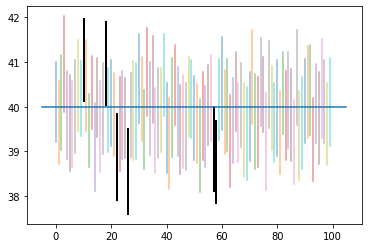

In [26]:
x = np.random.normal(loc=40, scale=5,size=10000)

sample = np.reshape(x,(100,100))

sample.shape
nboot = 10000
n = 100
k=0
for i in range(0,100):
    y = sample[i]
    xbar = y.mean()
    tmpdata = np.random.choice(y, n*nboot, replace=True)
    bootstrapsample = np.reshape(tmpdata, (n, nboot))
    xbarstar = bootstrapsample.mean(axis=0)
    deltastar = xbarstar - xbar
    d = np.percentile(deltastar, q=[2.5, 97.5])
    plt.plot([i,i],[xbar-d[1],xbar-d[0]],alpha=.5)
    if (xbar-d[1]<= 40 <= xbar-d[0])==False:
        plt.plot([i,i],[xbar-d[1],xbar-d[0]],c="black",linewidth=2)
plt.plot([-5,105],[40,40])
plt.show()